In [1]:
import numpy as np
import pandas as pd

In [2]:
data1=pd.read_csv('https://raw.githubusercontent.com/reddyprasade/Data-Sets-For-Machine-Learnig-and-Data-Science/master/DataSets/state-abbrevs.csv')
data1.head(2)

,state,abbreviation
0,Alabama,AL
1,Alaska,AK


In [46]:
data2=pd.read_csv('https://raw.githubusercontent.com/reddyprasade/Data-Sets-For-Machine-Learnig-and-Data-Science/master/DataSets/state-areas.csv')
data2.tail(2)

,state,area (sq. mi)
50,District of Columbia,68
51,Puerto Rico,3515


In [47]:
data3=pd.read_csv('https://raw.githubusercontent.com/reddyprasade/Data-Sets-For-Machine-Learnig-and-Data-Science/master/DataSets/state-population.csv')
data3.head(2)

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0


In [5]:
data1.isna().sum()

state           0
abbreviation    0
dtype: int64

In [6]:
data2.isna().sum()

state            0
area (sq. mi)    0
dtype: int64

In [7]:
data3.isna().sum()

state/region     0
ages             0
year             0
population      20
dtype: int64

In [8]:
data4=data3.ffill(axis = 1)

In [9]:
data4.isna().sum()

state/region    0
ages            0
year            0
population      0
dtype: int64

In [10]:
import scipy as stats
import seaborn as sns
import pandas_profiling
sns.pairplot(data2)

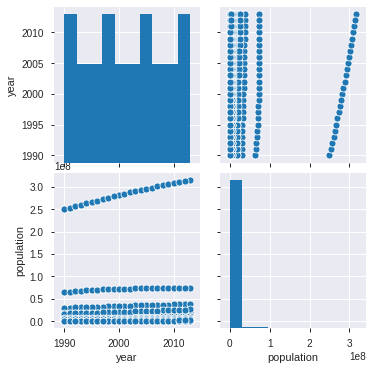

In [11]:
sns.pairplot(data4)

In [12]:
pandas_profiling.ProfileReport(data1)

/home/manikanta/.local/lib/python3.6/site-packages/pandas_profiling/model/correlations.py:35: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr - 1.0), (rcorr - 1.0)))


In [13]:
pandas_profiling.ProfileReport(data2)

In [14]:
pandas_profiling.ProfileReport(data4)

In [15]:
pandas_profiling.ProfileReport(data4)

In [16]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   state         51 non-null     object
 1   abbreviation  51 non-null     object
dtypes: object(2)
memory usage: 944.0+ bytes


In [17]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   state          52 non-null     object
 1   area_(sq._mi)  52 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 960.0+ bytes


In [18]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   state/region  2544 non-null   object
 1   ages          2544 non-null   object
 2   year          2544 non-null   object
 3   population    2544 non-null   object
dtypes: object(4)
memory usage: 79.6+ KB


In [19]:
data1.shape

(51, 2)

In [20]:
data2.shape

(52, 2)

In [21]:
data4.shape

(2544, 4)

In [22]:
data1.columns

Index(['state', 'abbreviation'], dtype='object')

In [23]:
data4.columns

Index(['state/region', 'ages', 'year', 'population'], dtype='object')

In [31]:
merged=pd.merge(data1,data3,how='outer',right_on='state/region',left_on='abbreviation')
merged

,state,abbreviation,state/region,ages,year,population
0,Alabama,AL,AL,under18,2012,1117489.0
1,Alabama,AL,AL,total,2012,4817528.0
2,Alabama,AL,AL,under18,2010,1130966.0
3,Alabama,AL,AL,total,2010,4785570.0
4,Alabama,AL,AL,under18,2011,1125763.0
...,...,...,...,...,...,...
2539,NaN,NaN,USA,total,2010,309326295.0
2540,NaN,NaN,USA,under18,2011,73902222.0
2541,NaN,NaN,USA,total,2011,311582564.0
2542,NaN,NaN,USA,under18,2012,73708179.0


In [32]:
merged=merged.drop('abbreviation',axis=1)

In [33]:
merged

,state,state/region,ages,year,population
0,Alabama,AL,under18,2012,1117489.0
1,Alabama,AL,total,2012,4817528.0
2,Alabama,AL,under18,2010,1130966.0
3,Alabama,AL,total,2010,4785570.0
4,Alabama,AL,under18,2011,1125763.0
...,...,...,...,...,...
2539,NaN,USA,total,2010,309326295.0
2540,NaN,USA,under18,2011,73902222.0
2541,NaN,USA,total,2011,311582564.0
2542,NaN,USA,under18,2012,73708179.0


In [34]:
merged.isna().sum()

state           96
state/region     0
ages             0
year             0
population      20
dtype: int64

In [35]:
merged[merged['state'].isnull()]

,state,state/region,ages,year,population
2448,NaN,PR,under18,1990,NaN
2449,NaN,PR,total,1990,NaN
2450,NaN,PR,total,1991,NaN
2451,NaN,PR,under18,1991,NaN
2452,NaN,PR,total,1993,NaN
...,...,...,...,...,...
2539,NaN,USA,total,2010,309326295.0
2540,NaN,USA,under18,2011,73902222.0
2541,NaN,USA,total,2011,311582564.0
2542,NaN,USA,under18,2012,73708179.0


In [36]:
merged.loc[merged['state'].isnull(),'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [37]:
merged.loc[merged['state/region']=='PR','state']='Puerto Rico'
merged.loc[merged['state/region']=='USA','state']='United States'
merged.isnull().any()


state           False
state/region    False
ages            False
year            False
population       True
dtype: bool

In [38]:
merged

,state,state/region,ages,year,population
0,Alabama,AL,under18,2012,1117489.0
1,Alabama,AL,total,2012,4817528.0
2,Alabama,AL,under18,2010,1130966.0
3,Alabama,AL,total,2010,4785570.0
4,Alabama,AL,under18,2011,1125763.0
...,...,...,...,...,...
2539,United States,USA,total,2010,309326295.0
2540,United States,USA,under18,2011,73902222.0
2541,United States,USA,total,2011,311582564.0
2542,United States,USA,under18,2012,73708179.0


In [44]:
data2.columns

Index(['state', 'area_(sq._mi)'], dtype='object')

In [56]:
merged

,state,state/region,ages,year,population
0,Alabama,AL,under18,2012,1117489.0
1,Alabama,AL,total,2012,4817528.0
2,Alabama,AL,under18,2010,1130966.0
3,Alabama,AL,total,2010,4785570.0
4,Alabama,AL,under18,2011,1125763.0
...,...,...,...,...,...
2539,United States,USA,total,2010,309326295.0
2540,United States,USA,under18,2011,73902222.0
2541,United States,USA,total,2011,311582564.0
2542,United States,USA,under18,2012,73708179.0


In [59]:
final=pd.merge(merged,data3)
final.head()

,state,state/region,ages,year,population
0,Alabama,AL,under18,2012,1117489.0
1,Alabama,AL,total,2012,4817528.0
2,Alabama,AL,under18,2010,1130966.0
3,Alabama,AL,total,2010,4785570.0
4,Alabama,AL,under18,2011,1125763.0


In [60]:
final.isnull().any()

state           False
state/region    False
ages            False
year            False
population       True
dtype: bool

In [66]:
data2010=merged.query("year==2010 & ages=='total'")

In [68]:
data2010.set_index('state',inplace=True)
data2010

KeyError: "None of ['state'] are in the columns"

In [69]:
density=data2010['population'] / data2010['area_(sq._mi)']

KeyError: 'area_(sq._mi)'

In [71]:
density.sort_values(ascending=True)

NameError: name 'density' is not defined

In [70]:
final.isnull().describe()

,state,state/region,ages,year,population
count,2544,2544,2544,2544,2544
unique,1,1,1,1,2
top,False,False,False,False,False
freq,2544,2544,2544,2544,2524


In [72]:
data=pd.to_pickle(final,'us_states_data.plk')

In [74]:
final.to_csv('us_states_data.csv')

In [75]:
unpickled_df=pd.read_pickle('us_states_data.plk')
unpickled_df

,state,state/region,ages,year,population
0,Alabama,AL,under18,2012,1117489.0
1,Alabama,AL,total,2012,4817528.0
2,Alabama,AL,under18,2010,1130966.0
3,Alabama,AL,total,2010,4785570.0
4,Alabama,AL,under18,2011,1125763.0
...,...,...,...,...,...
2539,United States,USA,total,2010,309326295.0
2540,United States,USA,under18,2011,73902222.0
2541,United States,USA,total,2011,311582564.0
2542,United States,USA,under18,2012,73708179.0
